In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

In [2]:
# Import the requests library
import requests

#import the API key
from config import weather_api_key

In [3]:
# starting URL for Wather Map API Call
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key

In [4]:
# create a set of random latitudes and longitudes combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs=zip(lats,lngs)
lats_lngs

In [5]:
# Import Citipy
from citipy import citipy

#Add lats and long to list
coordinates=list(lats_lngs)

In [6]:
# Create a list for holding the cities
cities=[]
#identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

615

In [10]:
#Create an empty list to hold the weather data
city_data=[]
#print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------------------------")

#Create counters
record_count=1
set_count=1
#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i%50==0 and i>=50):
        set_count+=1
        record_count=1
        time.sleep(60)
        
    #Create endpoint URL with each city
    city_url=url+"&q="+ city.replace(" ","+")
    
    #Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} i {city}")
    
    #Add 1 to the record count
    record_count+=1
    
#Run an API request for each of the cities

    try:
        #Parse the Json and retrieve data
        city_weather=requests.get(city_url).json()
        #Parse out the needed data
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds=city_weather["clouds"]["all"]
        city_wind=city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        #convert the date to ISO standard
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        #Append the city information into city_Data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    #If error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    
#Indicate that data loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 i kamaishi
Processing Record 2 of Set 1 i portland
Processing Record 3 of Set 1 i barrow
Processing Record 4 of Set 1 i aguilas
Processing Record 5 of Set 1 i rikitea
Processing Record 6 of Set 1 i qaqortoq
Processing Record 7 of Set 1 i ushuaia
Processing Record 8 of Set 1 i castro
Processing Record 9 of Set 1 i port alfred
Processing Record 10 of Set 1 i nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 i norman wells
Processing Record 12 of Set 1 i arraial do cabo
Processing Record 13 of Set 1 i saldanha
Processing Record 14 of Set 1 i illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 i liusha
Processing Record 16 of Set 1 i puerto leguizamo
Processing Record 17 of Set 1 i mayumba
Processing Record 18 of Set 1 i aksarka
Processing Record 19 of Set 1 i hobart
Processing Record 20 of Set 1 i ruatoria
City not found. Skipping...
Processing Record 21 

In [11]:
#Convert the arrary of dictionaries to a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamaishi,39.2667,141.8833,72.05,87,82,2.42,JP,2022-07-18 17:29:03
1,Portland,45.5234,-122.6762,67.98,70,75,5.01,US,2022-07-18 17:24:05
2,Barrow,71.2906,-156.7887,37.42,93,100,16.11,US,2022-07-18 17:29:03
3,Aguilas,37.4063,-1.5829,86.70,49,0,5.91,ES,2022-07-18 17:29:04
4,Rikitea,-23.1203,-134.9692,74.16,79,97,12.15,PF,2022-07-18 17:29:04
5,Qaqortoq,60.7167,-46.0333,48.07,75,56,4.63,GL,2022-07-18 17:29:04
6,Ushuaia,-54.8000,-68.3000,42.46,49,20,8.05,AR,2022-07-18 17:29:05
7,Castro,-24.7911,-50.0119,58.03,96,100,5.03,BR,2022-07-18 17:25:34
8,Port Alfred,-33.5906,26.8910,67.84,56,4,9.84,ZA,2022-07-18 17:29:05
9,Norman Wells,65.2820,-126.8329,64.44,72,75,5.75,CA,2022-07-18 17:29:06


In [12]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kamaishi,JP,2022-07-18 17:29:03,39.2667,141.8833,72.05,87,82,2.42
1,Portland,US,2022-07-18 17:24:05,45.5234,-122.6762,67.98,70,75,5.01
2,Barrow,US,2022-07-18 17:29:03,71.2906,-156.7887,37.42,93,100,16.11
3,Aguilas,ES,2022-07-18 17:29:04,37.4063,-1.5829,86.70,49,0,5.91
4,Rikitea,PF,2022-07-18 17:29:04,-23.1203,-134.9692,74.16,79,97,12.15
5,Qaqortoq,GL,2022-07-18 17:29:04,60.7167,-46.0333,48.07,75,56,4.63
6,Ushuaia,AR,2022-07-18 17:29:05,-54.8000,-68.3000,42.46,49,20,8.05
7,Castro,BR,2022-07-18 17:25:34,-24.7911,-50.0119,58.03,96,100,5.03
8,Port Alfred,ZA,2022-07-18 17:29:05,-33.5906,26.8910,67.84,56,4,9.84
9,Norman Wells,CA,2022-07-18 17:29:06,65.2820,-126.8329,64.44,72,75,5.75


In [13]:
len(city_data)

567

In [14]:
#Create the output file (csv)
output_data_file="weather_data/cities.csv"
#Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevent fields from the DataFrame for plotting
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=["Wind Speed"]

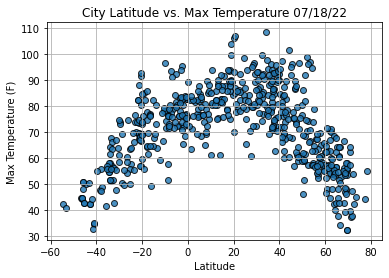

In [30]:
#Import time module
import time

#Build the scatterplot for lat. vs max temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

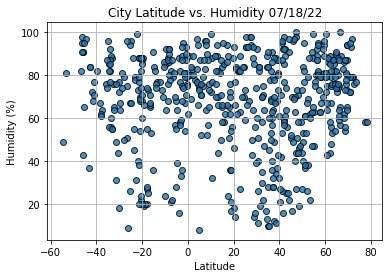

In [31]:
#Build the scatterplot for lat. vs humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

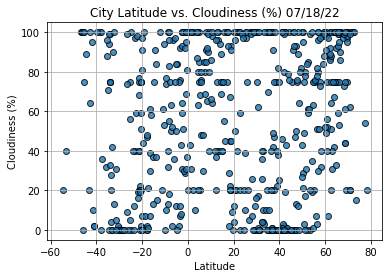

In [32]:
#Build the scatterplot for lat. vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

ValueError: x and y must be the same size

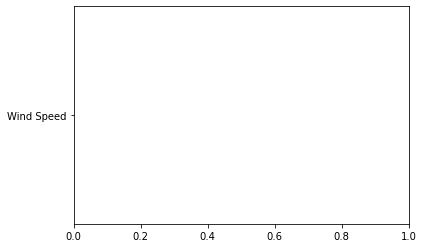

In [33]:
#Build the scatterplot for lat. vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()

In [34]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        567 non-null    object 
 1   Country     567 non-null    object 
 2   Date        567 non-null    object 
 3   Lat         567 non-null    float64
 4   Lng         567 non-null    float64
 5   Max Temp    567 non-null    float64
 6   Humidity    567 non-null    int64  
 7   Cloudiness  567 non-null    int64  
 8   Wind Speed  567 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 40.0+ KB


1